In [ ]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, Input, GlobalMaxPool2D
import seaborn as sn
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from google.colab import drive
drive.mount('/content/drive')

%matplotlib inline

Mounted at /content/drive


In [ ]:
# load data
data_path = '/content/drive/MyDrive/colab/plant pathology/'
img_path = '/content/drive/MyDrive/colab/plant pathology/images'

train_set = pd.read_csv(data_path + 'train.csv')
test_set = pd.read_csv(data_path + 'test.csv')

In [ ]:
train_set.shape

(1821, 5)

In [ ]:
test_set.shape

(1821, 1)

In [ ]:
train_set.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [ ]:
test_set["imaged_id_fileName"]  = test_set.image_id + ".jpg"

In [ ]:
test_set.head()

,image_id,imaged_id_fileName
0,Test_0,Test_0.jpg
1,Test_1,Test_1.jpg
2,Test_2,Test_2.jpg
3,Test_3,Test_3.jpg
4,Test_4,Test_4.jpg


In [ ]:
import shutil
import os
from shutil import copyfile

# if os.path.exists(data_path+'temp/'):
#     shutil.rmtree(data_path+'temp/')

# os.mkdir(data_path+'temp/')

# # train directory
# os.mkdir(data_path+'temp/train')
# os.mkdir(data_path+'temp/train/healthy')
# os.mkdir(data_path+'temp/train/multiple_diseases')
# os.mkdir(data_path+'temp/train/rust')
# os.mkdir(data_path+'temp/train/scab')

# # validation directory
# os.mkdir(data_path+'temp/valid')
# os.mkdir(data_path+'temp/valid/healthy')
# os.mkdir(data_path+'temp/valid/multiple_diseases')
# os.mkdir(data_path+'temp/valid/rust')
# os.mkdir(data_path+'temp/valid/scab')

In [ ]:
# import numpy as np
# SOURCE = data_path+'images/'

TRAIN_DIR = data_path+'temp/train/'

# for index, data in train_set.iterrows():
#     label = train_set.columns[np.argmax(data)]
#     filepath = os.path.join(SOURCE, index + ".jpg")
#     destination = os.path.join(TRAIN_DIR, label, index + ".jpg")
#     copyfile(filepath, destination)
    
# for subdir in os.listdir(TRAIN_DIR):
#     print(subdir, len(os.listdir(os.path.join(TRAIN_DIR, subdir))))

In [ ]:
VALID_DIR = data_path+'temp/valid/'
# TEXT_DIR = data_path +  

# for index, data in valid_set.iterrows():
#     label = train_set.columns[np.argmax(data)]
#     filepath = os.path.join(SOURCE, index + ".jpg")
#     destination = os.path.join(VALID_DIR, label, index + ".jpg")
#     copyfile(filepath, destination)
    
# for subdir in os.listdir(VALID_DIR):
#     print(subdir, len(os.listdir(os.path.join(VALID_DIR, subdir))))

In [ ]:
import random
import numpy as np
import os
import cv2
import glob
from PIL import Image
import PIL.ImageOps    

# num_augmented_images = 350

# file_path = data_path+'temp/train/multiple_diseases/'
# file_names = os.listdir(file_path)
# total_origin_image_num = len(file_names)
# augment_cnt = 1

# for i in range(1, num_augmented_images):
#     change_picture_index = random.randrange(1, total_origin_image_num-1)
#     file_name = file_names[change_picture_index]
    
#     origin_image_path =  data_path+'temp/train/multiple_diseases/' + file_name
#     image = Image.open(origin_image_path)
#     random_augment = random.randrange(1,3)
    
#     if(random_augment == 1):
#         augment1_image = image.transpose(Image.FLIP_LEFT_RIGHT)
#         augment1_image = augment1_image.rotate(random.randrange(-20, 20))
#         augment1_image.save(file_path+ str(augment_cnt) + '.jpg')
        
#     elif(random_augment == 2):
#         augment2_image = image.transpose(Image.FLIP_TOP_BOTTOM)
#         augment2_image = augment2_image.rotate(random.randrange(-20, 20))
#         augment2_image.save(file_path + str(augment_cnt) + '.jpg')
        
#     augment_cnt += 1

In [ ]:
for subdir in os.listdir(TRAIN_DIR):
    print(subdir, len(os.listdir(os.path.join(TRAIN_DIR, subdir))))

healthy 413
multiple_diseases 422
rust 497
scab 473


In [ ]:
for subdir in os.listdir(VALID_DIR):
    print(subdir, len(os.listdir(os.path.join(VALID_DIR, subdir))))

healthy 103
multiple_diseases 18
rust 125
scab 119


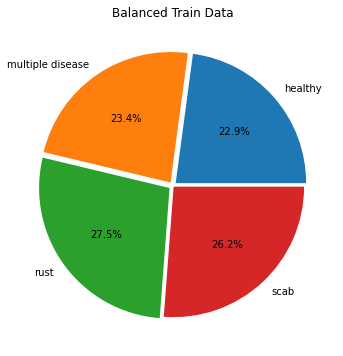

In [ ]:
healthy_b = len(os.listdir(os.path.join(TRAIN_DIR, 'healthy')))
multiple_diseases_b = len(os.listdir(os.path.join(TRAIN_DIR, 'multiple_diseases')))
rust_b = len(os.listdir(os.path.join(TRAIN_DIR, 'rust')))
scab_b = len(os.listdir(os.path.join(TRAIN_DIR, 'scab')))

plt.figure(figsize=(6, 6))
label = ['healthy', 'multiple disease', 'rust', 'scab']
explode = [0.03, 0.03, 0.03, 0.01]
plt.pie([healthy_b, multiple_diseases_b, rust_b, scab_b],
       labels=label,
       autopct='%.1f%%',
       explode=explode)
plt.title("Balanced Train Data")
plt.show()

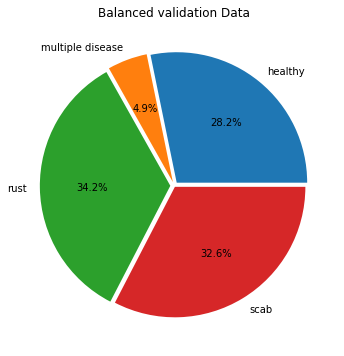

In [ ]:
healthy_b = len(os.listdir(os.path.join(VALID_DIR, 'healthy')))
multiple_diseases_b = len(os.listdir(os.path.join(VALID_DIR, 'multiple_diseases')))
rust_b = len(os.listdir(os.path.join(VALID_DIR, 'rust')))
scab_b = len(os.listdir(os.path.join(VALID_DIR, 'scab')))

plt.figure(figsize=(6, 6))
label = ['healthy', 'multiple disease', 'rust', 'scab']
explode = [0.03, 0.03, 0.03, 0.01]
plt.pie([healthy_b, multiple_diseases_b, rust_b, scab_b],
       labels=label,
       autopct='%.1f%%',
       explode=explode)
plt.title("Balanced validation Data")
plt.show()

In [ ]:
from keras.layers.pooling import MaxPooling2D
from tensorflow.keras.applications import VGG19
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

# input_tensor = Input(shape=(224, 224, 3), dtype='float32', name='input')
base_model  = VGG19(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False
model = keras.Sequential(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(4, activation='softmax'))
optimizerAdam = Adam(learning_rate=0.00001, amsgrad=True)
model.compile(optimizer=optimizerAdam, loss = 'categorical_crossentropy',  metrics=['accuracy'])
model.summary()
print("freeze 후 훈련되는 가중치 수 : " , len(model.trainable_weights))

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                              patience=20)  
                          
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = data_path + 'best_model.h5',       
                             monitor='val_loss',  
                             verbose=1,           
                             save_best_only=True,  
                             mode='min')

80150528/80134624 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_1 (Batc  (None, 512)              20

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

img_height = 224
img_width = 224
batch_size = 32
epochs = 100
labels = ["healthy","multiple_diseases","rust","scab"]

training_datagen = ImageDataGenerator(rescale = 1./255,
                                      rotation_range=30,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest'
                                      )

validation_datagen = ImageDataGenerator(rescale = 1./255)

test_dataGenerator = ImageDataGenerator(rescale=1./255)

train_generator = training_datagen.flow_from_directory(TRAIN_DIR, target_size=(img_height,img_width), class_mode='categorical', batch_size=batch_size)
train_generator2 = training_datagen.flow_from_directory(TRAIN_DIR, target_size=(img_height,img_width), class_mode='categorical', batch_size=batch_size, shuffle=False)
validation_generator = validation_datagen.flow_from_directory(VALID_DIR, target_size=(img_height,img_width), class_mode='categorical', batch_size=batch_size)
validation_generator2 = validation_datagen.flow_from_directory(VALID_DIR, target_size=(img_height,img_width), class_mode='categorical', batch_size=batch_size, shuffle=False) 
#Keras predict_generator로 confusion matrix를 그렸을 때 accuracy가 안 맞는 오류 때문에 생성
#실제로 해보니 shuffle 하기 전 validation의 label과 shuffle 후 validation predict를 비교하는 것을 확인할 수 있었음.

test_generator = test_dataGenerator.flow_from_dataframe(
    dataframe=test_set,x_col='imaged_id_fileName', y_col=labels,
    directory=img_path, shuffle = False, sort = False,
    target_size=(img_height, img_width), batch_size=1, class_mode=None)


Found 1805 images belonging to 4 classes.
Found 1805 images belonging to 4 classes.
Found 365 images belonging to 4 classes.
Found 365 images belonging to 4 classes.
Found 1821 validated image filenames.


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch = train_generator.samples // batch_size,
      validation_data=validation_generator,
      validation_steps = validation_generator.samples // batch_size,
      epochs=15)

Epoch 1/15
56/56 [==============================] - 472s 8s/step - loss: 1.5860 - accuracy: 0.3768 - val_loss: 1.3389 - val_accuracy: 0.3807
Epoch 2/15
56/56 [==============================] - 94s 2s/step - loss: 1.1524 - accuracy: 0.5324 - val_loss: 1.2203 - val_accuracy: 0.4801
Epoch 3/15
56/56 [==============================] - 98s 2s/step - loss: 1.0915 - accuracy: 0.5505 - val_loss: 1.0894 - val_accuracy: 0.5568
Epoch 4/15
56/56 [==============================] - 98s 2s/step - loss: 1.0286 - accuracy: 0.5956 - val_loss: 0.9924 - val_accuracy: 0.6108
Epoch 5/15
56/56 [==============================] - 95s 2s/step - loss: 0.9583 - accuracy: 0.6385 - val_loss: 0.9441 - val_accuracy: 0.6222
Epoch 6/15
56/56 [==============================] - 97s 2s/step - loss: 0.9015 - accuracy: 0.6610 - val_loss: 0.9475 - val_accuracy: 0.6278
Epoch 7/15
56/56 [==============================] - 96s 2s/step - loss: 0.8569 - accuracy: 0.6723 - val_loss: 0.9297 - val_accuracy: 0.6222
Epoch 8/15
56/56 [=

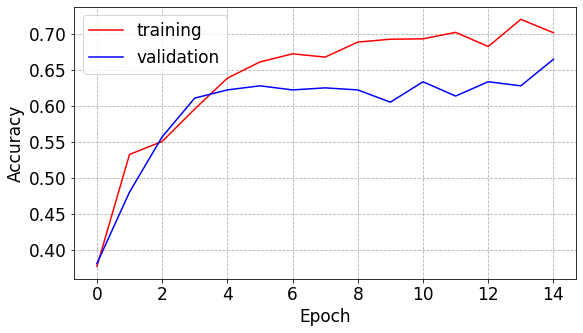

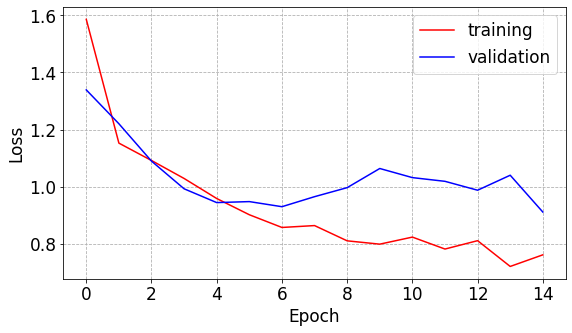

In [ ]:
fs = 17
fig = plt.figure(figsize=(9,5))
fig.patch.set_facecolor('xkcd:white')
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.ylabel('Accuracy',fontsize=fs)
plt.xlabel('Epoch',fontsize=fs)
plt.legend(['training', 'validation'],fontsize=fs)
plt.grid('both', linestyle='--')
plt.xticks(fontsize = fs)
plt.yticks(fontsize = fs)
plt.show()

fig = plt.figure(figsize=(9,5))
fig.patch.set_facecolor('xkcd:white')
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.ylabel('Loss',fontsize=fs)
plt.xlabel('Epoch',fontsize=fs)
plt.legend(['training', 'validation'],fontsize=fs)
plt.grid('both', linestyle='--')
plt.xticks(fontsize = fs)
plt.yticks(fontsize = fs)
plt.show()

In [ ]:
base_model.trainable = True
model.compile(optimizer=optimizerAdam, loss = 'categorical_crossentropy',  metrics=['accuracy'])
model.summary()
print("unfreeze 후 훈련되는 가중치 수 : " , len(model.trainable_weights))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                        

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch = train_generator.samples // batch_size,
      validation_data=validation_generator,
      validation_steps = validation_generator.samples // batch_size,
      epochs=epochs,
      callbacks = [earlystopping, checkpoint]
      )

Epoch 1/100
56/56 [==============================] - ETA: 0s - loss: 0.8493 - accuracy: 0.7005
Epoch 00001: val_loss improved from inf to 4.44959, saving model to /content/drive/MyDrive/colab/plant pathology/best_model.h5
56/56 [==============================] - 118s 2s/step - loss: 0.8493 - accuracy: 0.7005 - val_loss: 4.4496 - val_accuracy: 0.3466
Epoch 2/100
56/56 [==============================] - ETA: 0s - loss: 0.5727 - accuracy: 0.8105
Epoch 00002: val_loss improved from 4.44959 to 1.74820, saving model to /content/drive/MyDrive/colab/plant pathology/best_model.h5
56/56 [==============================] - 106s 2s/step - loss: 0.5727 - accuracy: 0.8105 - val_loss: 1.7482 - val_accuracy: 0.5312
Epoch 3/100
56/56 [==============================] - ETA: 0s - loss: 0.4186 - accuracy: 0.8658
Epoch 00003: val_loss improved from 1.74820 to 0.81332, saving model to /content/drive/MyDrive/colab/plant pathology/best_model.h5
56/56 [==============================] - 105s 2s/step - loss: 0.41

In [ ]:
keras_model_best = keras.models.load_model(data_path + 'best_model.h5') # early stopping 된 모델 로드

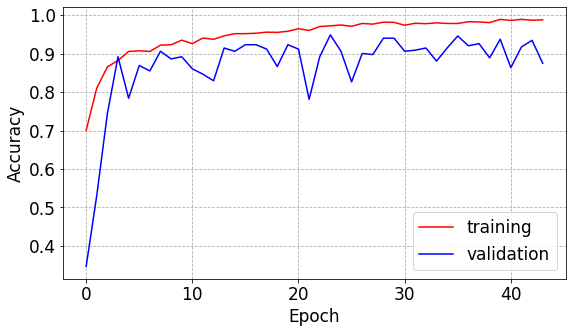

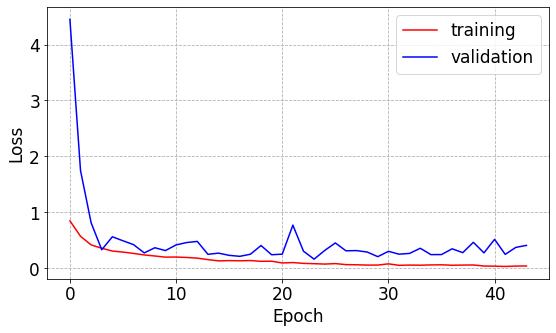

In [ ]:
fs = 17
fig = plt.figure(figsize=(9,5))
fig.patch.set_facecolor('xkcd:white')
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.ylabel('Accuracy',fontsize=fs)
plt.xlabel('Epoch',fontsize=fs)
plt.legend(['training', 'validation'],fontsize=fs)
plt.grid('both', linestyle='--')
plt.xticks(fontsize = fs)
plt.yticks(fontsize = fs)
plt.show()

fig = plt.figure(figsize=(9,5))
fig.patch.set_facecolor('xkcd:white')
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.ylabel('Loss',fontsize=fs)
plt.xlabel('Epoch',fontsize=fs)
plt.legend(['training', 'validation'],fontsize=fs)
plt.grid('both', linestyle='--')
plt.xticks(fontsize = fs)
plt.yticks(fontsize = fs)
plt.show()

In [ ]:
Y_pred = keras_model_best.predict(train_generator2, train_generator2.samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_pred, train_generator2.classes))
print('Classification Report')
target_names = ["healthy","multiple_diseases","rust","scab"]

Confusion Matrix
[[412   4   5   3]
 [  0 392   8   1]
 [  0   3 481   0]
 [  1  23   3 469]]
Classification Report
                   precision    recall  f1-score   support

          healthy       1.00      0.97      0.98       424
multiple_diseases       0.93      0.98      0.95       401
             rust       0.97      0.99      0.98       484
             scab       0.99      0.95      0.97       496

         accuracy                           0.97      1805
        macro avg       0.97      0.97      0.97      1805
     weighted avg       0.97      0.97      0.97      1805



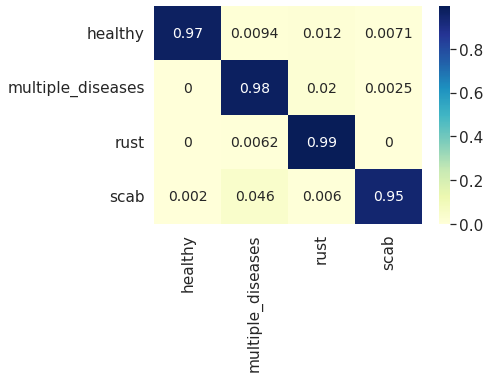

In [ ]:
cm = confusion_matrix( y_pred ,train_generator2.classes, normalize='true')
sn.set(font_scale=0.9)
sn.heatmap(cm, annot=True, annot_kws={"size": 14}, cmap="YlGnBu", fmt='d', xticklabels = labels, yticklabels = labels)
plt.show()

In [ ]:
Y_pred = keras_model_best.predict(validation_generator2, validation_generator2.samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_pred, validation_generator2.classes))
print('Classification Report')
target_names = ["healthy","multiple_diseases","rust","scab"]
print(classification_report(y_pred, validation_generator2.classes, target_names=target_names))

Confusion Matrix
[[101   3   0   4]
 [  0  11   2   2]
 [  0   3 123   1]
 [  2   1   0 112]]
Classification Report
                   precision    recall  f1-score   support

          healthy       0.98      0.94      0.96       108
multiple_diseases       0.61      0.73      0.67        15
             rust       0.98      0.97      0.98       127
             scab       0.94      0.97      0.96       115

         accuracy                           0.95       365
        macro avg       0.88      0.90      0.89       365
     weighted avg       0.95      0.95      0.95       365



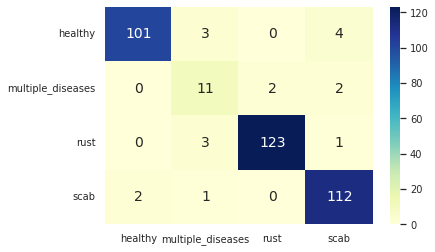

In [ ]:
cm = confusion_matrix( y_pred ,validation_generator2.classes)
sn.set(font_scale=0.9)
sn.heatmap(cm, annot=True, annot_kws={"size": 14}, cmap="YlGnBu", fmt='d', xticklabels = labels, yticklabels = labels)
plt.show()

In [ ]:
test_predictions = keras_model_best.predict(test_generator)

In [ ]:
predictions = pd.DataFrame()
predictions['image_id'] = test_set.image_id
predictions['healthy'] = test_predictions[:, 0]
predictions['multiple_diseases'] = test_predictions[:, 1]
predictions['rust'] = test_predictions[:, 2]
predictions['scab'] = test_predictions[:, 3]
predictions.to_csv(data_path + 'submission.csv', index=False)
predictions.head(20)

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0.000299,1.195602e-03,0.998488,0.000017
1,Test_1,0.012086,1.534923e-01,0.821772,0.012650
2,Test_2,0.000031,2.766452e-05,0.000003,0.999939
3,Test_3,0.999995,4.835730e-10,0.000004,0.000001
4,Test_4,0.045677,6.560407e-01,0.298246,0.000036
5,Test_5,0.999114,2.218740e-04,0.000086,0.000578
6,Test_6,0.999616,1.952261e-06,0.000026,0.000356
7,Test_7,0.000158,1.878625e-04,0.000036,0.999618
8,Test_8,0.000200,1.333534e-03,0.000006,0.998461
9,Test_9,0.000034,1.087651e-05,0.999952,0.000004
